
Name: Rahmani Dibansa

Date: 24th of August 2022

Description:
    This contains my homework for lecture 6 where the task is to
    use my face to detect the celebrity that looks like me

Reference(s):

    ACMSIGGRAPH. SIGGRAPH Now | Hands-on Workshop: Machine Learning and Neural Networks – Lecture 6

    Retrieved from: https://www.youtube.com/watch?v=BnK7V5sgXXQ&list=PLUPhVMQuDB_b2kcOooEduedthcBH53mvC&index=8



In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import skimage.transform
from google.colab.patches import cv2_imshow
import cv2

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-dbbqp7t4
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-dbbqp7t4


In [4]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras, pyyaml, six, numpy, h5py, pillow, scipy
Required-by: 


In [5]:
import mtcnn
mtcnn_model = mtcnn.MTCNN()

In [6]:
# Having issues with vgg face?
# This might help: https://github.com/rcmalli/keras-vggface/issues/73
import keras_vggface
from keras_vggface.utils import decode_predictions
from keras_vggface.utils import preprocess_input

In [7]:
# create an instance of the vggface model
vgg_model = keras_vggface.VGGFace(model='resnet50')
print('Inputs:', vgg_model.inputs)
print('Outputs:', vgg_model.outputs)

Inputs: [<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>]
Outputs: [<KerasTensor: shape=(None, 8631) dtype=float32 (created by layer 'classifier')>]


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
face_path = '/content/drive/MyDrive/Colab Notebooks/Faces/'
names_faces = {
    # name        :  face 
    'Rahms'   : 'Rahms.jpg',
    'LeeKuanYew'  : 'LeeKuanYew.jpg',
    'JianBinChen'        : 'JianBinChen.jpg',
    'ChowYunFat'        : 'ChowYunFat.jpg',
    'MannyPacquaio'         : 'MannyPacquaio.jpg',
    'JackieChan'         : 'JackieChan.jpg'
}
print(names_faces)

{'Rahms': 'Rahms.jpg', 'LeeKuanYew': 'LeeKuanYew.jpg', 'JianBinChen': 'JianBinChen.jpg', 'ChowYunFat': 'ChowYunFat.jpg', 'MannyPacquaio': 'MannyPacquaio.jpg', 'JackieChan': 'JackieChan.jpg'}


Rahms

 Rahms


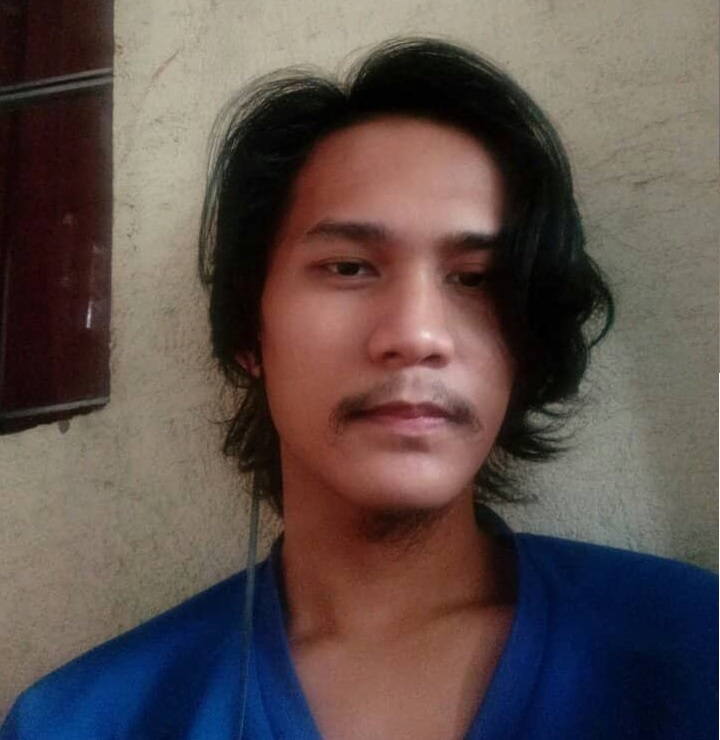

LeeKuanYew

 LeeKuanYew


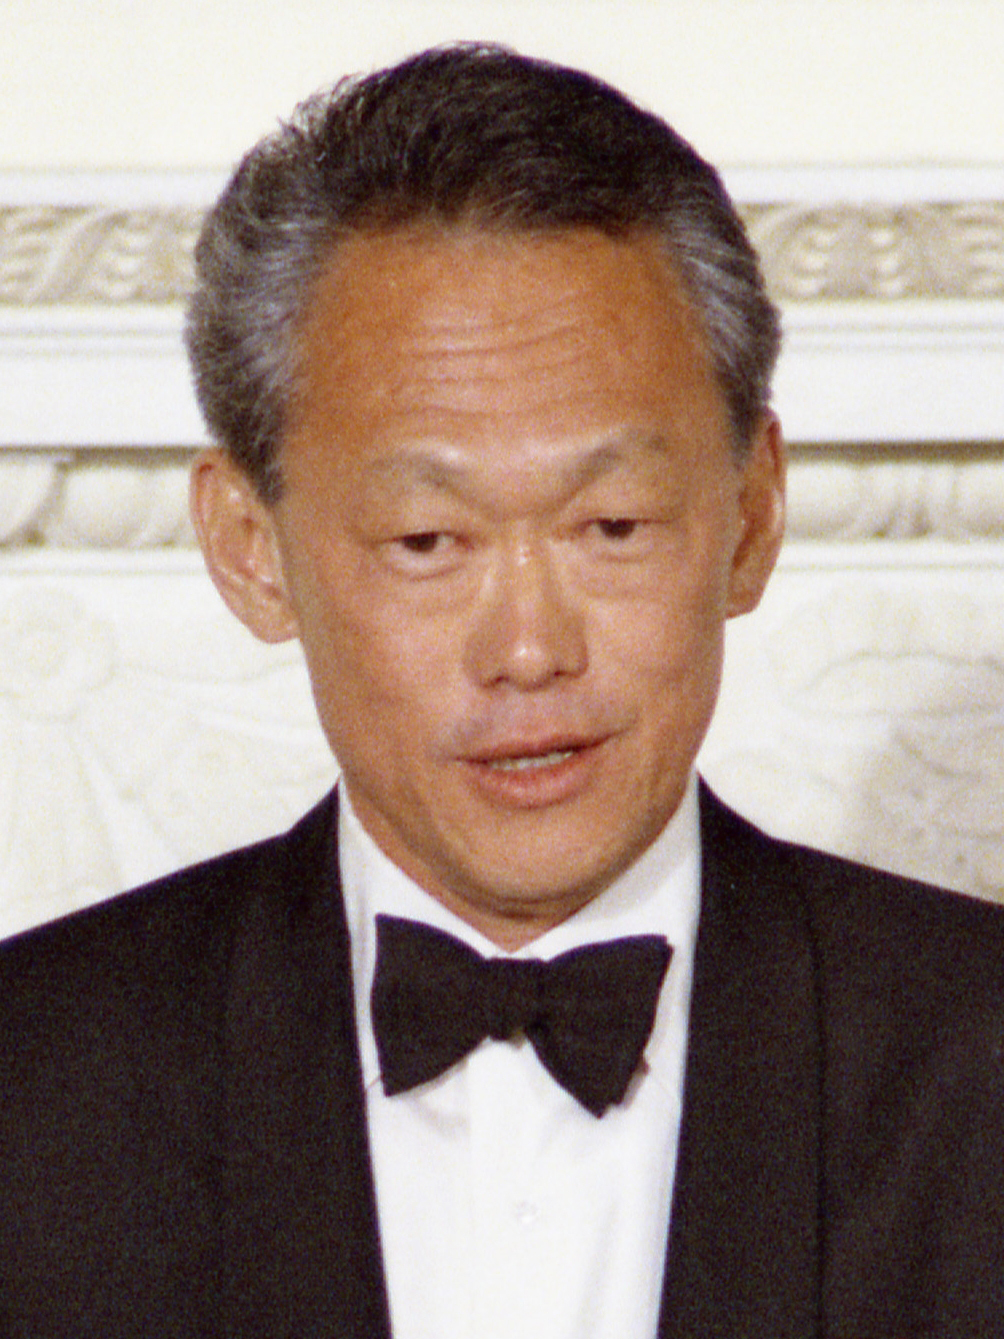

JianBinChen

 JianBinChen


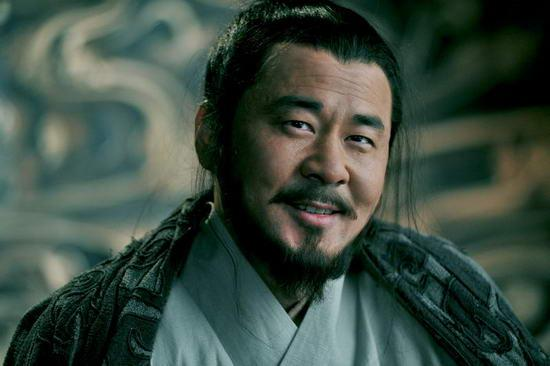

ChowYunFat

 ChowYunFat


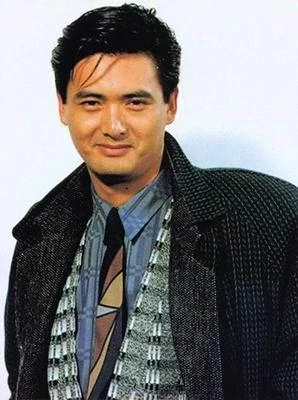

MannyPacquaio

 MannyPacquaio


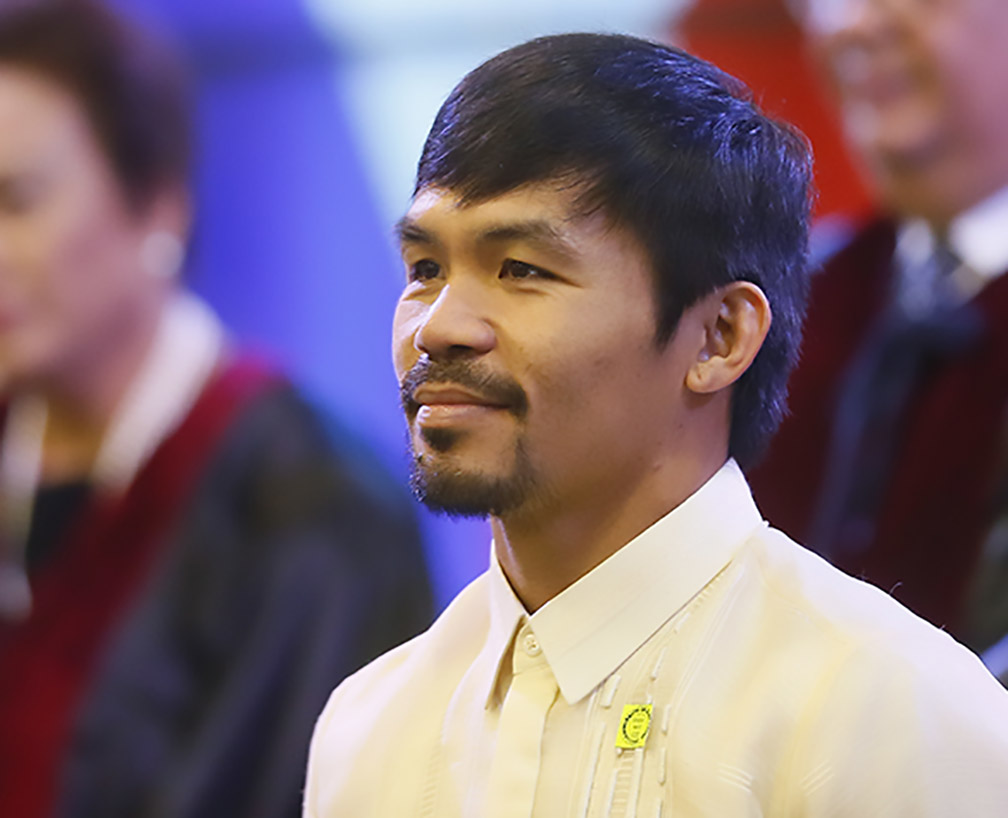

JackieChan

 JackieChan


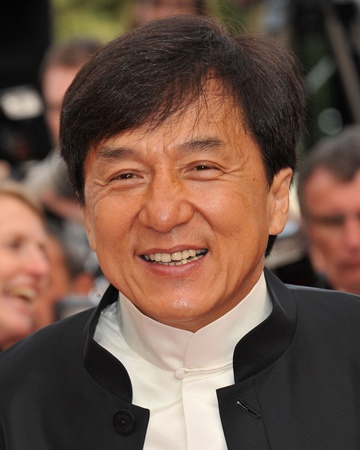

In [10]:
# show the images (these will be our ground truth)
for name, face in names_faces.items(): 
  print( name)
  #print( face)
  #replace file names with actual images in the dictionary
  img = cv2.imread(face_path+face)
  # cv2 by default stores images in BGR format, store in RGB
  names_faces[name] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  print('\n', name)
  cv2_imshow(img)

In [11]:
def vgg_match(img, x, y, w, h):
  #only the face part
  face_only = img[y:y+h, x:x+w, :]
  # resize to 224x224 (without stretching) 
  face_only = skimage.transform.resize(face_only,(224, 224), mode='reflect', preserve_range=True)
  # prep image in format that vgg expects
  face_only_batch = np.expand_dims(face_only, 0)
  face_only = preprocess_input(face_only_batch, version=2)
  # find encoding
  prediction = vgg_model.predict(face_only)
  return prediction
  

In [12]:
def match_faces(face_dict):
    for name, face in face_dict.items():
        # find face-like regions in the image
        detected_faces = mtcnn_model.detect_faces(face)
        # extract details of the face
        for i in range(0, len(detected_faces)):
            x, y, w, h = detected_faces[i]['box']
            vgg_prediction = vgg_match(face, x, y, w, h)
            matches = decode_predictions(vgg_prediction)
            # display most likely results
            print(name)
            for match in matches[0]:
	              print('%s: %.3f%%' % (match[0], match[1]*100))
            print('') 
            break # assume only one face per image   

In [13]:
match_faces(names_faces)

1359872/1346516 [==============================] - 0s 0us/step
Rahms
b' Nova_Eliza': 9.186%
b' Joem_Bascon': 6.524%
b' Enchong_Dee': 5.914%
b' Rick_Gonzalez': 3.958%
b' Rodjun_Cruz': 3.144%

LeeKuanYew
b' Ichir\xc5\x8d_Ozawa': 13.416%
b' Seiji_Maehara': 4.797%
b' John_Liu': 3.412%
b' Patrice_Rio': 3.280%
b' Alex_Noerdin': 2.635%

JianBinChen
b' Louis_Koo': 28.011%
b' Joseph_Estrada': 14.228%
b' Tengku_Abdullah': 4.270%
b' Alesana_Tuilagi': 3.128%
b' Andy_Lau': 2.225%

ChowYunFat
b' Baichung_Bhutia': 11.254%
b' Geoff_Eigenmann': 6.704%
b' Yoshikatsu_Kawaguchi': 4.548%
b' Gabby_Concepcion': 4.162%
b' Mehmet_Kurtulu\xc5\x9f': 3.371%

MannyPacquaio
b' Bryant_McKinnie': 9.531%
b' David_Tua': 4.757%
b' Brian_Viloria': 3.202%
b' Shin-Soo_Choo': 2.529%
b' Yoan_Pablo_Hern\xc3\xa1ndez': 2.383%

JackieChan
b' An_Jeong-hwan': 7.903%
b' Seiji_Maehara': 2.223%
b' Ma_Ying-jeou': 1.986%
b' Gong_Yoo': 1.846%
b' Baichung_Bhutia': 1.577%

